In [1]:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.utils import resample

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from wordcloud import WordCloud, STOPWORDS


In [2]:
df1=pd.read_csv('../../data/saveplanet_data_clean.csv')
df1['label'] = 'savetheplanet'
#remove rt from clean_text
df1['clean_text'] = df1['clean_text'].str.replace('RT', '')
df1.head()

,Unnamed: 0,text,clean_text,Tweet_tokenized,Tweet_without_stop,Tweet_stemmed,Tweet_lemmatized,label
0,0,@ScallyNancy So think about who is bringing in...,ScallyNancy So think about who is bringing in ...,"['scallynancy', 'so', 'think', 'about', 'who',...","['scallynancy', 'think', 'bringing', 'recordbr...","['scallyn', 'think', 'bring', 'recordbreak', '...","['scallynancy', 'think', 'bringing', 'recordbr...",savetheplanet
1,1,RT @luluonti: #Agroecology #Agroecologia #or...,luluonti Agroecology Agroecologia organicfa...,"['rt', 'luluonti', 'agroecology', 'agroecologi...","['rt', 'luluonti', 'agroecology', 'agroecologi...","['rt', 'luluonti', 'agroecolog', 'agroecologia...","['rt', 'luluonti', 'agroecology', 'agroecologi...",savetheplanet
2,2,RT @aliceyadavis: what about digital livestock...,aliceyadavis what about digital livestock can...,"['rt', 'aliceyadavis', 'what', 'about', 'digit...","['rt', 'aliceyadavis', 'digital', 'livestock',...","['rt', 'aliceyadavi', 'digit', 'livestock', 'w...","['rt', 'aliceyadavis', 'digital', 'livestock',...",savetheplanet
3,3,RT @elagoradiario: El #CambioClimático es una ...,elagoradiario El CambioClimático es una reali...,"['rt', 'elagoradiario', 'el', 'cambioclimático...","['rt', 'elagoradiario', 'el', 'cambioclimático...","['rt', 'elagoradiario', 'el', 'cambioclimático...","['rt', 'elagoradiario', 'el', 'cambioclimático...",savetheplanet
4,4,#Agroecology #Agroecologia #organicfarming ...,Agroecology Agroecologia organicfarming org...,"['agroecology', 'agroecologia', 'organicfarmin...","['agroecology', 'agroecologia', 'organicfarmin...","['agroecolog', 'agroecologia', 'organicfarm', ...","['agroecology', 'agroecologia', 'organicfarmin...",savetheplanet


In [3]:
df2=pd.read_csv('../../data/Clean_Twitter_New_data.csv')
df2['label'] = 'climatechange'
df2['clean_text'] = df2['clean_text'].str.replace('RT', '')
df2.head()

,Unnamed: 0,text,clean_text,Tweet_tokenized,Tweet_without_stop,Tweet_stemmed,Tweet_lemmatized,label
0,0,RT @BeccasButterfli: Found out something about...,BeccasButterfli Found out something about my ...,"['rt', 'beccasbutterfli', 'found', 'out', 'som...","['rt', 'beccasbutterfli', 'found', 'something'...","['rt', 'beccasbutterfli', 'found', 'someth', '...","['rt', 'beccasbutterfli', 'found', 'something'...",climatechange
1,1,The pressure is mounting for asset owners to t...,The pressure is mounting for asset owners to t...,"['the', 'pressure', 'is', 'mounting', 'for', '...","['pressure', 'mounting', 'asset', 'owners', 't...","['pressur', 'mount', 'asset', 'owner', 'tackl'...","['pressure', 'mounting', 'asset', 'owner', 'ta...",climatechange
2,2,RT @CFigueres: Coming back to this once more. ...,CFigueres Coming back to this once more If y...,"['rt', 'cfigueres', 'coming', 'back', 'to', 't...","['rt', 'cfigueres', 'coming', 'back', 'underst...","['rt', 'cfiguer', 'come', 'back', 'understand'...","['rt', 'cfigueres', 'coming', 'back', 'underst...",climatechange
3,3,RT @SDG_Academy: #Cities can either be catalys...,SDGAcademy Cities can either be catalysts of ...,"['rt', 'sdgacademy', 'cities', 'can', 'either'...","['rt', 'sdgacademy', 'cities', 'either', 'cata...","['rt', 'sdgacademi', 'citi', 'either', 'cataly...","['rt', 'sdgacademy', 'city', 'either', 'cataly...",climatechange
4,4,Annual global temperatures from 1850-2017. Sti...,Annual global temperatures from Still think t...,"['annual', 'global', 'temperatures', 'from', '...","['annual', 'global', 'temperatures', 'still', ...","['annual', 'global', 'temperatur', 'still', 't...","['annual', 'global', 'temperature', 'still', '...",climatechange


In [4]:
df = pd.concat([df1, df2], ignore_index=True)
#export to csv
df.to_csv('../../data/DT_data.csv', index=False)
df.tail()

,Unnamed: 0,text,clean_text,Tweet_tokenized,Tweet_without_stop,Tweet_stemmed,Tweet_lemmatized,label
745,245,RT @ELPANAMEN0: @jolenebuntinguk #WEMUSTBEUNIT...,ELPANAMEN jolenebuntinguk WEMUSTBEUNITED\nALL...,"['rt', 'elpanamen', 'jolenebuntinguk', 'wemust...","['rt', 'elpanamen', 'jolenebuntinguk', 'wemust...","['rt', 'elpanamen', 'jolenebuntinguk', 'wemust...","['rt', 'elpanamen', 'jolenebuntinguk', 'wemust...",climatechange
746,246,@YouthforLifeNI2 @jolenebuntinguk #WEMUSTBEUNI...,YouthforLifeNI jolenebuntinguk WEMUSTBEUNITED\...,"['youthforlifeni', 'jolenebuntinguk', 'wemustb...","['youthforlifeni', 'jolenebuntinguk', 'wemustb...","['youthforlifeni', 'jolenebuntinguk', 'wemustb...","['youthforlifeni', 'jolenebuntinguk', 'wemustb...",climatechange
747,247,#WEMUSTBEUNITED\nALL SLAVES MUST OBEY\n#ALLSLA...,WEMUSTBEUNITED\nALL SLAVES MUST OBEY\nALLSLAVE...,"['wemustbeunited', 'all', 'slaves', 'must', 'o...","['wemustbeunited', 'slaves', 'must', 'obey', '...","['wemustbeunit', 'slave', 'must', 'obey', 'all...","['wemustbeunited', 'slave', 'must', 'obey', 'a...",climatechange
748,248,@jolenebuntinguk #WEMUSTBEUNITED\nALL SLAVES M...,jolenebuntinguk WEMUSTBEUNITED\nALL SLAVES MUS...,"['jolenebuntinguk', 'wemustbeunited', 'all', '...","['jolenebuntinguk', 'wemustbeunited', 'slaves'...","['jolenebuntinguk', 'wemustbeunit', 'slave', '...","['jolenebuntinguk', 'wemustbeunited', 'slave',...",climatechange
749,249,RT @cheynman: Finally got around to reading th...,cheynman Finally got around to reading this s...,"['rt', 'cheynman', 'finally', 'got', 'around',...","['rt', 'cheynman', 'finally', 'got', 'around',...","['rt', 'cheynman', 'final', 'got', 'around', '...","['rt', 'cheynman', 'finally', 'got', 'around',...",climatechange


In [5]:
df = df[['label','Tweet_lemmatized']]
df.head()

,label,Tweet_lemmatized
0,savetheplanet,"['scallynancy', 'think', 'bringing', 'recordbr..."
1,savetheplanet,"['rt', 'luluonti', 'agroecology', 'agroecologi..."
2,savetheplanet,"['rt', 'aliceyadavis', 'digital', 'livestock',..."
3,savetheplanet,"['rt', 'elagoradiario', 'el', 'cambioclimático..."
4,savetheplanet,"['agroecology', 'agroecologia', 'organicfarmin..."


In [6]:

final_tweets=[i.replace(",","").replace("[","").replace("]","").replace("'","") for i in df['Tweet_lemmatized']]
final_tweets[0:5]

['scallynancy think bringing recordbreaking support ever gas consumption order burn planet even faster gopclimatekiller california florida u usa midterm midterm generalelection ecotax savetheplanet climatechange climatecrisis',
 'rt luluonti agroecology agroecologia organicfarming organicfood savetheplanet',
 'rt aliceyadavis digital livestock weaken deforestation cow nft worth real cow nfts savetheplanet ',
 'rt elagoradiario el cambioclimático e una realidad por ello e necesario cuidar del reflexionar sobre su poder para cambiar de ru ',
 'agroecology agroecologia organicfarming organicfood savetheplanet httpstcosdomkxhssp']

In [7]:
df['final_tweets']=final_tweets

In [8]:
df=df.drop('Tweet_lemmatized',axis=1)
df.head()
#write to csv
df.to_csv('../../data/combined_data.csv',index=False)

Text(0, 0.5, 'Frequency')

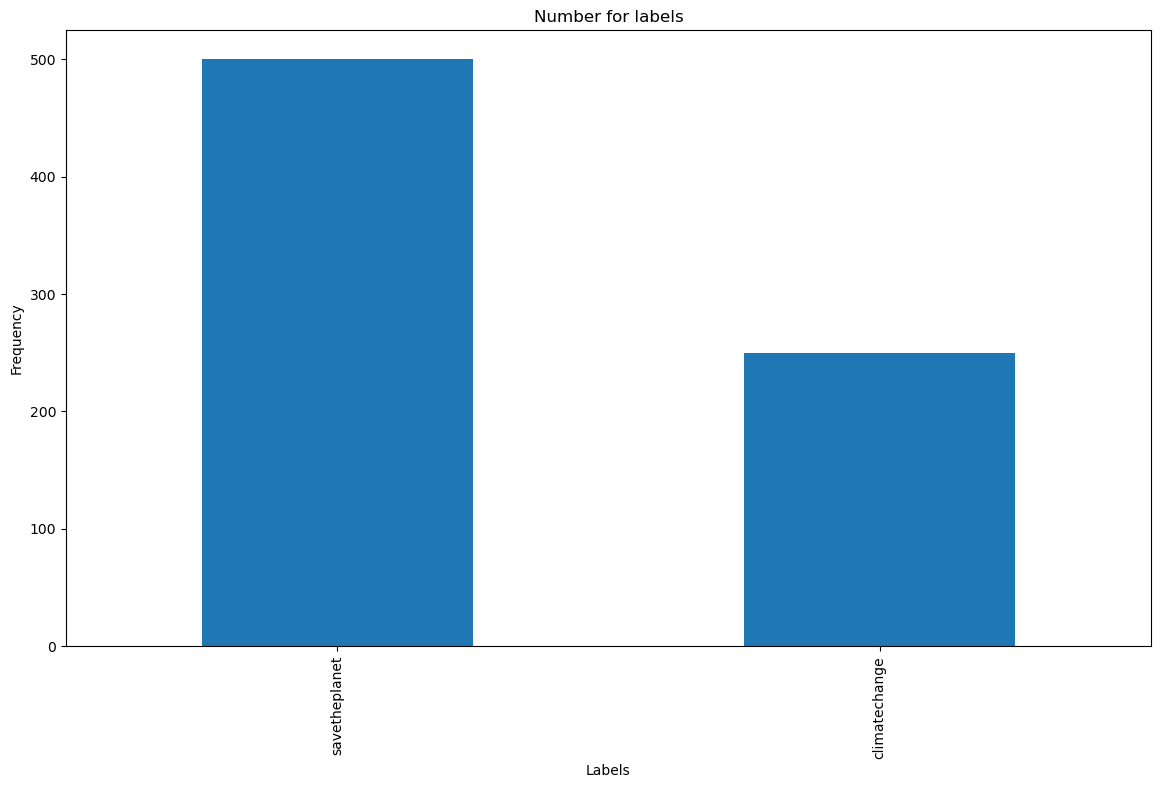

In [9]:
df['final_tweets'] = df['final_tweets'].str.replace('rt', '')
ax = df['label'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for labels")
ax.set_xlabel("Labels")
ax.set_ylabel("Frequency")

In [10]:

# Separate majority and minority classes
df_majority = df[df.label=='savetheplanet']
df_minority = df[df.label=='climatechange']
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results

In [11]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.label.value_counts()

savetheplanet    250
climatechange    250
Name: label, dtype: int64

In [12]:
X=df_downsampled['final_tweets'].values
y=df_downsampled['label'].values

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
import random as rd
MyCV_content=CountVectorizer(input='content',
                        stop_words='english'
                        #max_features=100
                        )

My_DTM2=MyCV_content.fit_transform(X)
ColNames=MyCV_content.get_feature_names()
My_DF_content=pd.DataFrame(My_DTM2.toarray(),columns=ColNames)


My_DF_content['LABEL'] = pd.DataFrame(y,columns=['LABEL'])
rd.seed(1997)
TrainDF, TestDF = train_test_split(My_DF_content, test_size=0.25)
TrainLabels=TrainDF["LABEL"]
TestLabels=TestDF["LABEL"]

TrainDF = TrainDF.drop(["LABEL"], axis=1)
TestDF = TestDF.drop(["LABEL"], axis=1)


/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
from collections import Counter
Counter(y).keys()
Counter(y).values()

dict_values([250, 250])

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        61
           1       1.00      0.91      0.95        64

    accuracy                           0.95       125
   macro avg       0.96      0.95      0.95       125
weighted avg       0.96      0.95      0.95       125



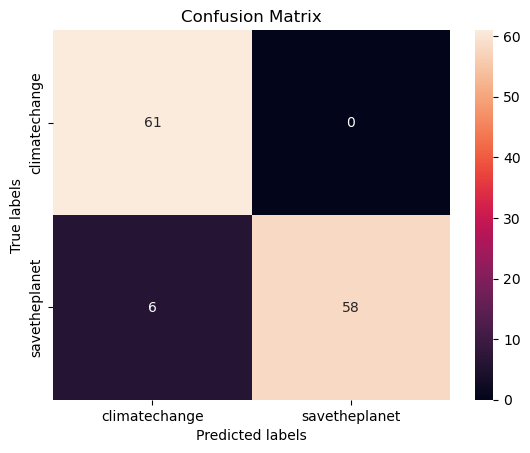

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

MyModelNB= MultinomialNB(alpha = 1)

NB1=MyModelNB.fit(TrainDF, TrainLabels)
Preds = MyModelNB.predict(TestDF)
Pred_Proba = MyModelNB.predict_proba(TestDF)
print(metrics.classification_report(TestLabels, Preds))
cnf_matrix1 = confusion_matrix(TestLabels, Preds)

##Visualise Confusion Matrix
labels = ['climatechange', 'savetheplanet']
ax1=plt.subplot()
sns.heatmap(confusion_matrix(TestLabels, Preds), annot=True, fmt='g', ax=ax1);

# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels'); 
ax1.set_title('Confusion Matrix'); 
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels);
plt.show()
plt.close()



              precision    recall  f1-score   support

           0       0.91      1.00      0.95        61
           1       1.00      0.91      0.95        64

    accuracy                           0.95       125
   macro avg       0.96      0.95      0.95       125
weighted avg       0.96      0.95      0.95       125



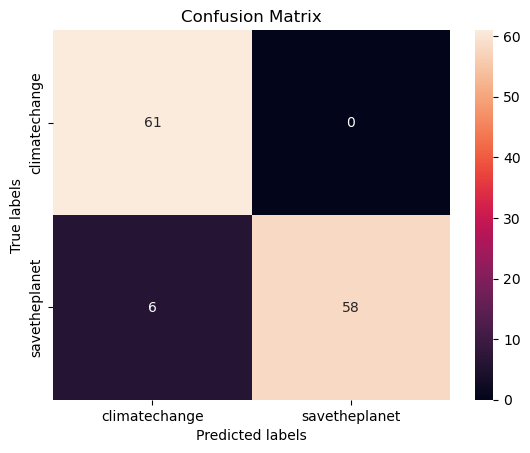

In [17]:
MyModelNB3= MultinomialNB(alpha =5)

NB3=MyModelNB3.fit(TrainDF, TrainLabels)
Preds3 = MyModelNB3.predict(TestDF)
Pred_Proba3 = MyModelNB3.predict_proba(TestDF)
print(metrics.classification_report(TestLabels, Preds3))
cnf_matrix1 = confusion_matrix(TestLabels, Preds3)

##Visualise Confusion Matrix
labels = ['climatechange', 'savetheplanet']
ax1=plt.subplot()
sns.heatmap(confusion_matrix(TestLabels, Preds3), annot=True, fmt='g', ax=ax1);

# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels'); 
ax1.set_title('Confusion Matrix'); 
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels);
plt.show()
plt.close()


              precision    recall  f1-score   support

           0       0.88      0.93      0.90        61
           1       0.93      0.88      0.90        64

    accuracy                           0.90       125
   macro avg       0.91      0.90      0.90       125
weighted avg       0.91      0.90      0.90       125



/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


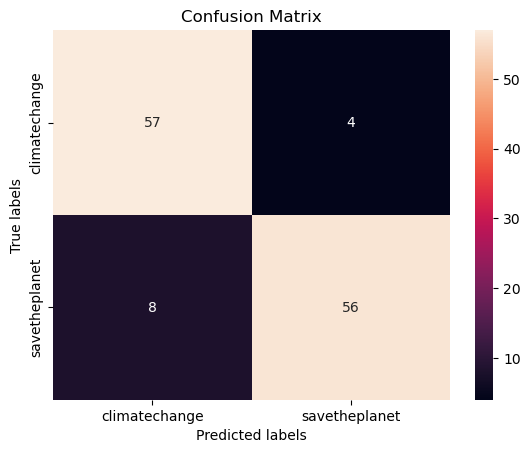

In [18]:
MyModelNB3= MultinomialNB(alpha =0)

NB3=MyModelNB3.fit(TrainDF, TrainLabels)
Preds3 = MyModelNB3.predict(TestDF)
Pred_Proba3 = MyModelNB3.predict_proba(TestDF)
print(metrics.classification_report(TestLabels, Preds3))
cnf_matrix1 = confusion_matrix(TestLabels, Preds3)

##Visualise Confusion Matrix
labels = ['climatechange', 'savetheplanet']
ax1=plt.subplot()
sns.heatmap(confusion_matrix(TestLabels, Preds3), annot=True, fmt='g', ax=ax1);

# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels'); 
ax1.set_title('Confusion Matrix'); 
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels);
plt.show()
plt.close()


In [19]:
class_0_prob_sorted = NB1.feature_log_prob_[0, :].argsort()[::-1]
class_1_prob_sorted = NB1.feature_log_prob_[1, :].argsort()[::-1]

print(np.take(MyCV_content.get_feature_names(), class_0_prob_sorted[:10]))
word_cloud_0 = Counter(np.take(MyCV_content.get_feature_names(), class_0_prob_sorted[:20]))
print(np.take(MyCV_content.get_feature_names(), class_1_prob_sorted[:10])) 
word_cloud_1 = Counter(np.take(MyCV_content.get_feature_names(), class_1_prob_sorted[:20]))


['climatechange' 'slave' 'allslavesmustobey' 'wemustbeunited'
 'democratcities' 'obey' 'farmer' 'video' 'putinfault' 'panama']
['savetheplanet' 'metoo' 'animalliberation' 'mentoo' 'animalstoo'
 'endspeciesism' 'good' 'climatechange' 'adoptdontshop' 'human']


/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


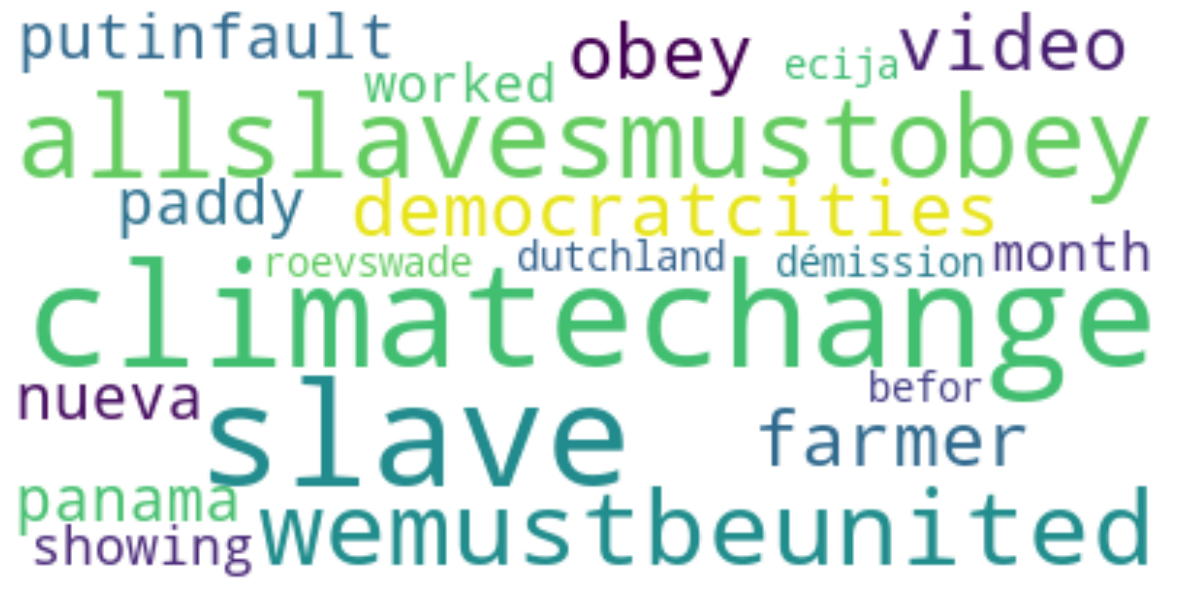

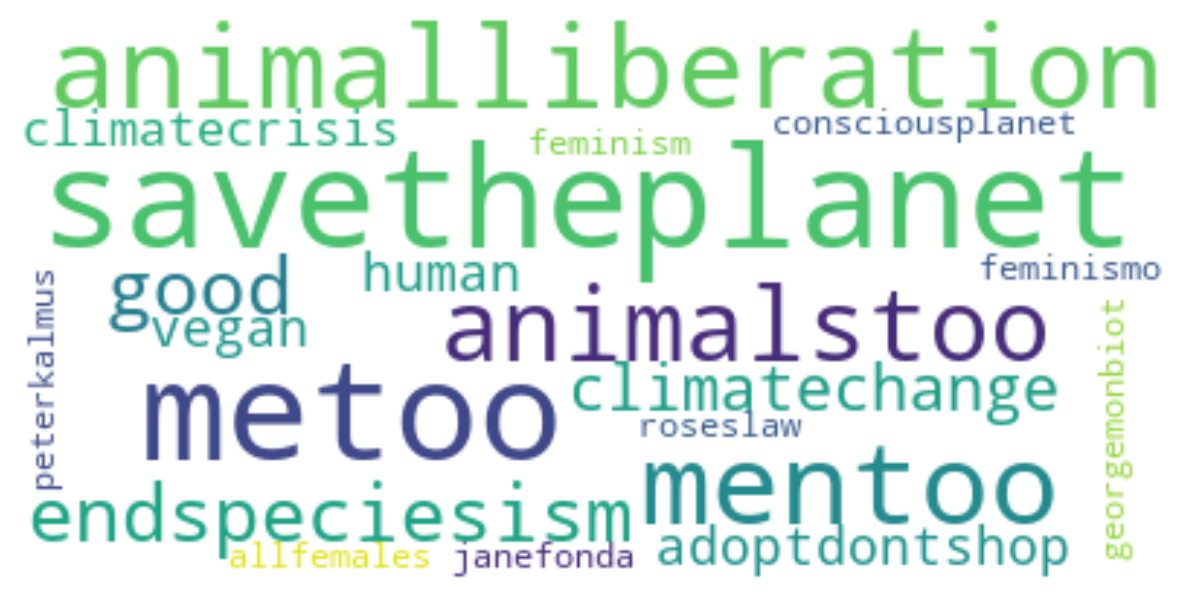

In [20]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(background_color='white').fit_words(word_cloud_0)

fig, ax = plt.subplots(figsize=(15,15))
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")




wordcloud = WordCloud(background_color='white').fit_words(word_cloud_1)

fig, ax = plt.subplots(figsize=(15,15))
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")
